In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0
!pip install scikit_learn==1.0.2
!pip install scipy==1.9.0

# Loading the data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/news_share_data.csv')
print(data.shape)
data.head()

(1003, 22)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/2014 0:00,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/2014 0:00,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/2014 0:00,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/2014 0:00,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/2014 0:00,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [12]:
df = data.copy()

In [14]:
# Selecting only numerical features
cols_to_drop = ['title','text','published_date','data_channel']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 18


In [15]:
features

['article_id',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares']

In [16]:
featuresMod =['article_id',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'min_avg_key',
 'max_avg_key',
 'avg_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'shares']
print(len(featuresMod))

18


In [17]:
dict(zip(features,featuresMod))

{'article_id': 'article_id',
 'unique_tokens_rate': 'unique_tokens_rate',
 'num_hrefs': 'num_hrefs',
 'num_imgs': 'num_imgs',
 'num_videos': 'num_videos',
 'average_token_length': 'average_token_length',
 'num_keywords': 'num_keywords',
 'min_avg_key': 'min_avg_key',
 'max_avg_key': 'max_avg_key',
 'avg_avg_key': 'avg_avg_key',
 'href_avg_shares': 'href_avg_shares',
 'global_subjectivity': 'global_subjectivity',
 'global_sentiment_polarity': 'global_sentiment_polarity',
 'global_rate_positive_words': 'global_rate_positive_words',
 'global_rate_negative_words': 'global_rate_negative_words',
 'title_subjectivity': 'title_subjectivity',
 'title_sentiment_polarity': 'title_sentiment_polarity',
 'shares': 'shares'}

In [19]:
import os

directory = 'model/'
if not os.path.exists(directory):
    os.makedirs(directory)

# Now you can proceed to save the pickle file
with open(fileName, 'wb') as f:
    pickle.dump(dict(zip(features, featuresMod)), f)


In [20]:
import pickle
fileName = 'model/features.pkl'

with open(fileName, 'wb') as f:
    pickle.dump(featuresMod,f)

In [21]:
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(1003, 18)


,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,0.640816,5,3,1,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,0.549618,4,1,0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,0.577236,8,1,0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,0.525896,4,1,0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,0.588889,6,9,0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [22]:
# IDV and DV
X = df_features.drop('shares',axis=1)
y = df_features[['shares']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(1003, 17)
(1003, 1)
((702, 17), (301, 17)) ((702, 1), (301, 1))


# Helper function to calculate prediction interval:

## Prediction/confidence Interval:

In [23]:
pi=0.9975
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score

3.023341439739154

In [24]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    '''
    Get the interval estimate for the regression model.

    INPUTS:
        - actual_values (y_train)
        - predicted_values (prediction from x_train)
        - Prediction interval threshold (default = .95)
    OUTPUT:
        - Interval estimate
    '''

    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))

    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev

    return interval


def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for the regression model.

    INPUTS:
        - Single prediction (test data),
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95)
    OUTPUT:
        - Prediction interval for single test prediction
    '''

    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))

    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev


    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]

# Models:

## Linear Regression:

In [25]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.066732524703074


In [26]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: -0.006256537524291117
Test MAE: 5388.374346339411
Test RMSE: 38456.08344387556


In [27]:
pd.DataFrame(zip(linear_reg.coef_.T, x_train.columns))

,0,1
0,[5.668023842993006e-05],article_id
1,[5772.901464690397],unique_tokens_rate
2,[114.37518887027485],num_hrefs
3,[-71.97160594977909],num_imgs
4,[-118.71776508794234],num_videos
5,[-1382.0660084881572],average_token_length
6,[-203.47442679327372],num_keywords
7,[-1.6194688528862422],min_avg_key
8,[-0.3156528702443799],max_avg_key
9,[2.1503712544345426],avg_avg_key


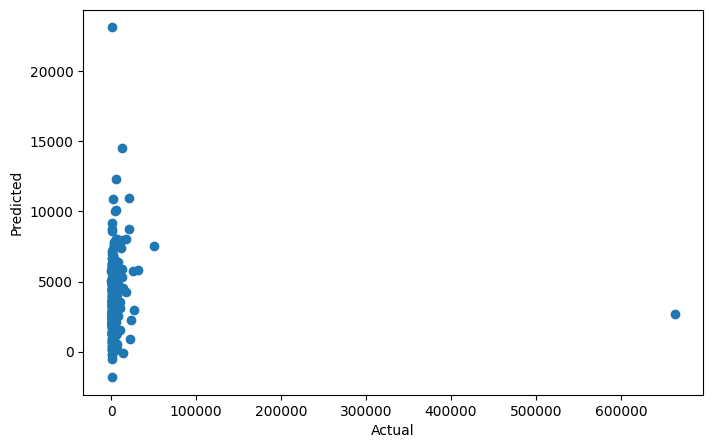

In [28]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [29]:
x_test[:10]

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity
836,7024688,0.814815,0,1,0,4.418182,6,2231.676,6283.500,3584.420,0.000,0.761111,0.427778,0.054545,0.000000,0.0000,0.00
993,7003169,0.477778,4,0,2,4.691646,5,3016.262,18851.050,6554.751,210300.000,0.432624,0.161028,0.035627,0.009828,0.5625,0.25
155,7012750,0.735537,8,0,1,4.479675,8,1070.100,7544.234,3108.700,3000.000,0.696429,0.115909,0.032520,0.016260,0.0000,0.00
769,7005664,0.635220,7,1,0,4.867692,4,2587.467,3602.060,3266.430,1532.500,0.377924,0.144006,0.024615,0.012308,0.0000,0.00
438,7029336,0.604096,8,1,0,4.708197,5,2219.468,4787.262,3071.467,2400.000,0.388333,0.092500,0.022951,0.019672,0.0000,0.00
363,7009504,0.592199,5,1,0,5.042105,5,2946.116,3571.914,3184.781,2355.667,0.420347,0.042674,0.031579,0.014035,0.0000,0.00
566,7007895,0.569912,12,1,0,4.865517,7,2448.250,4744.008,3700.804,0.000,0.384303,0.159601,0.043103,0.017241,0.5000,0.15
556,7027932,0.441913,9,1,0,4.669673,10,0.000,3574.499,2197.271,3800.000,0.440975,0.114292,0.038331,0.016911,0.4000,0.20
621,7027099,0.596059,4,2,0,4.975490,8,0.000,5300.000,2832.942,1900.000,0.379196,0.198951,0.058824,0.000000,0.0000,0.00
99,7033049,0.529197,7,2,0,4.814882,7,0.000,3578.163,1695.939,2800.000,0.523940,0.093535,0.043557,0.021779,0.8000,-0.60


In [30]:
preds_lr[:10]

array([[4361.51552409],
       [5100.67724779],
       [6255.68604612],
       [2566.91192628],
       [2369.40502334],
       [2317.44995936],
       [1960.92891586],
       [2814.3296159 ],
       [4496.86818365],
       [1244.60276252]])

In [31]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [32]:
print(lower_vet[:5])
print(upper_vet[:5])

[-14451.902294330319, -13712.740570629347, -12557.73177229135, -16246.505892134091, -16444.012795078386]
[23174.93334250102, 23914.095066201993, 25069.10386453999, 21380.32974469725, 21182.822841752954]


In [33]:
preds_lr.reshape(-1)

array([ 4361.51552409,  5100.67724779,  6255.68604612,  2566.91192628,
        2369.40502334,  2317.44995936,  1960.92891586,  2814.3296159 ,
        4496.86818365,  1244.60276252,  3655.73625124,  3500.94598934,
        1243.686073  ,  3294.29456125,  3713.70088464,  2288.37885144,
       10052.1446925 ,  2357.87274031,  2666.61070133,  4073.67236528,
         249.49742606,  2677.4984606 ,  6111.58963483,  7614.07750461,
        7794.33569464,  2492.17561351,   881.86122446,  3298.94664803,
        5996.83805585,  2080.74995691,  6683.6649457 ,  4938.84785333,
        4521.65878333,   503.98360485,   696.46439089,  6394.81594031,
        4895.3311049 ,  2413.19932821,  3884.16328036,  4787.40458634,
        3806.81290869,  3470.64052902,  5927.21690511,  2734.93205384,
        6794.95036795,  2659.20516999,  3301.31450557,  4914.36301155,
        3518.3272053 ,  2618.49867091,  6316.12896211,  2478.84492079,
        4021.06088177,  2937.86434502,  2681.44622704,  2276.90335434,
      

In [34]:
df_lr = pd.DataFrame(zip(lower_vet,upper_vet,preds_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(301, 3)


,lower,upper,mean
0,-14451.902294,23174.933343,4361.515524
1,-13712.740571,23914.095066,5100.677248
2,-12557.731772,25069.103865,6255.686046
3,-16246.505892,21380.329745,2566.911926
4,-16444.012795,21182.822842,2369.405023


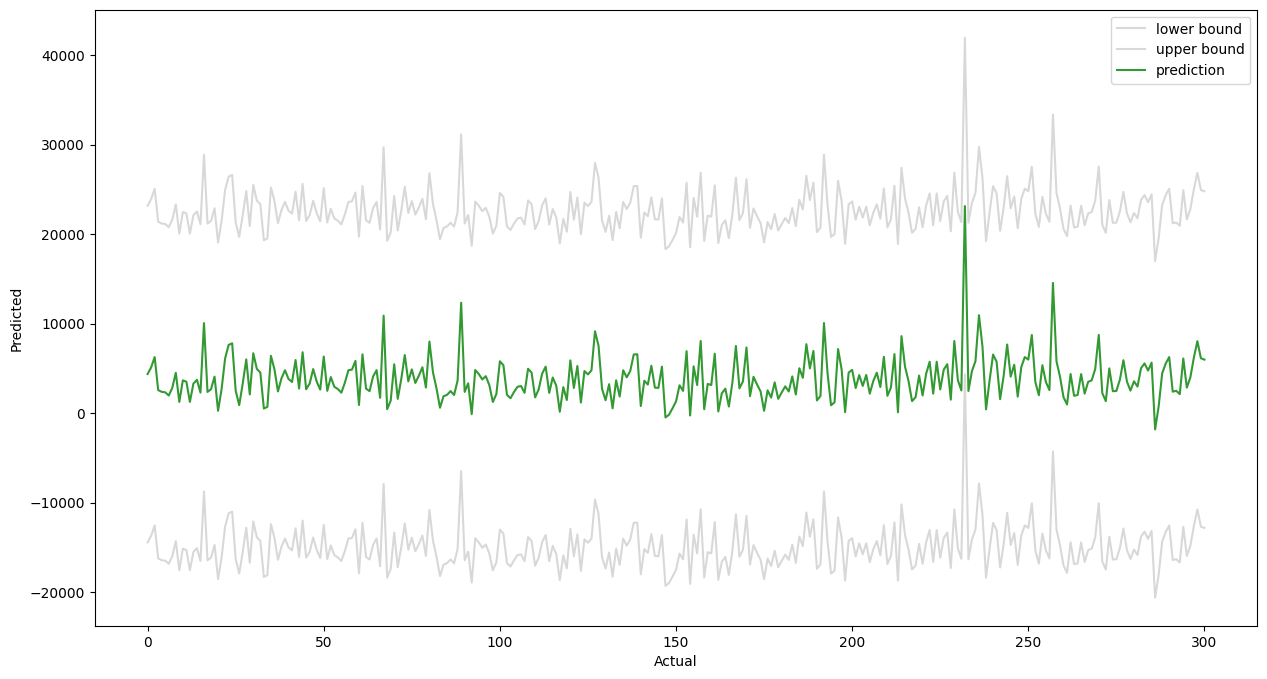

In [35]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_lr,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Ridge Regression: (L2 Regularization)

In [36]:
# Model training
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.06303086762371357


In [37]:
# Predicting on the test and evaluating the accuracy
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: -0.005668803986571103
Test MAE: 5341.101018443889
Test RMSE: 38444.85110380126


In [38]:
pd.DataFrame(zip(ridge.coef_.T, x_train.columns))

,0,1
0,[8.856856551674904e-06],article_id
1,[4802.172894538263],unique_tokens_rate
2,[114.87551830242909],num_hrefs
3,[-75.6007291004651],num_imgs
4,[-124.92439134500253],num_videos
5,[-1326.8569223792106],average_token_length
6,[-218.9847538954742],num_keywords
7,[-1.6345886323316128],min_avg_key
8,[-0.31526656676454823],max_avg_key
9,[2.157840027764102],avg_avg_key


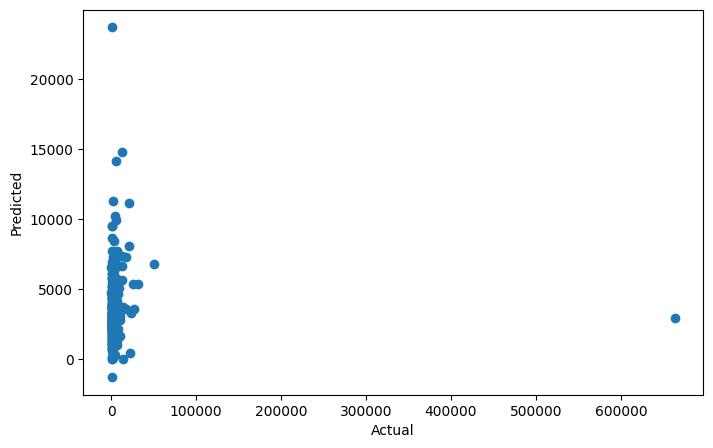

In [39]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [40]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_rid:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [41]:
print(lower_vet[:5])
print(upper_vet[:5])

[-14907.144966976535, -13616.7429611711, -13563.339569619817, -16107.353608238964, -16114.283634665708]
[22794.237254722786, 24084.639260528224, 24138.042652079504, 21594.02861346036, 21587.098587033615]


In [42]:
preds_rid.reshape(-1)

array([ 3.94354614e+03,  5.23394815e+03,  5.28735154e+03,  2.74333750e+03,
        2.73640748e+03,  1.65781614e+03,  2.42625993e+03,  2.88803645e+03,
        3.67472858e+03,  1.12940818e+03,  2.09016542e+03,  3.32923593e+03,
        1.33024717e+03,  3.53685548e+03,  3.78061457e+03,  2.09676918e+03,
        1.01985375e+04,  3.73139890e+03,  2.84115579e+03,  3.01723234e+03,
        2.51308140e+02,  2.92645609e+03,  5.33394384e+03,  7.41578001e+03,
        8.45240486e+03,  2.01699679e+03,  1.10385294e+03,  3.10985118e+03,
        4.92241680e+03,  3.23594771e+03,  6.65756027e+03,  5.11884049e+03,
        3.38665573e+03,  6.59884342e+02,  5.81712301e+01,  6.60006210e+03,
        5.16559597e+03,  3.39928484e+03,  3.71271734e+03,  4.85932701e+03,
        3.24807053e+03,  2.84606611e+03,  5.76487531e+03,  3.55504594e+03,
        7.29864694e+03,  2.10164604e+03,  3.71681026e+03,  5.02212687e+03,
        3.39849900e+03,  2.56959838e+03,  5.78470182e+03,  2.21956309e+03,
        3.32691764e+03,  

In [43]:
df_rid = pd.DataFrame(zip(lower_vet,upper_vet,preds_rid.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(301, 3)


,lower,upper,mean
0,-14907.144967,22794.237255,3943.546144
1,-13616.742961,24084.639261,5233.948150
2,-13563.339570,24138.042652,5287.351541
3,-16107.353608,21594.028613,2743.337503
4,-16114.283635,21587.098587,2736.407476


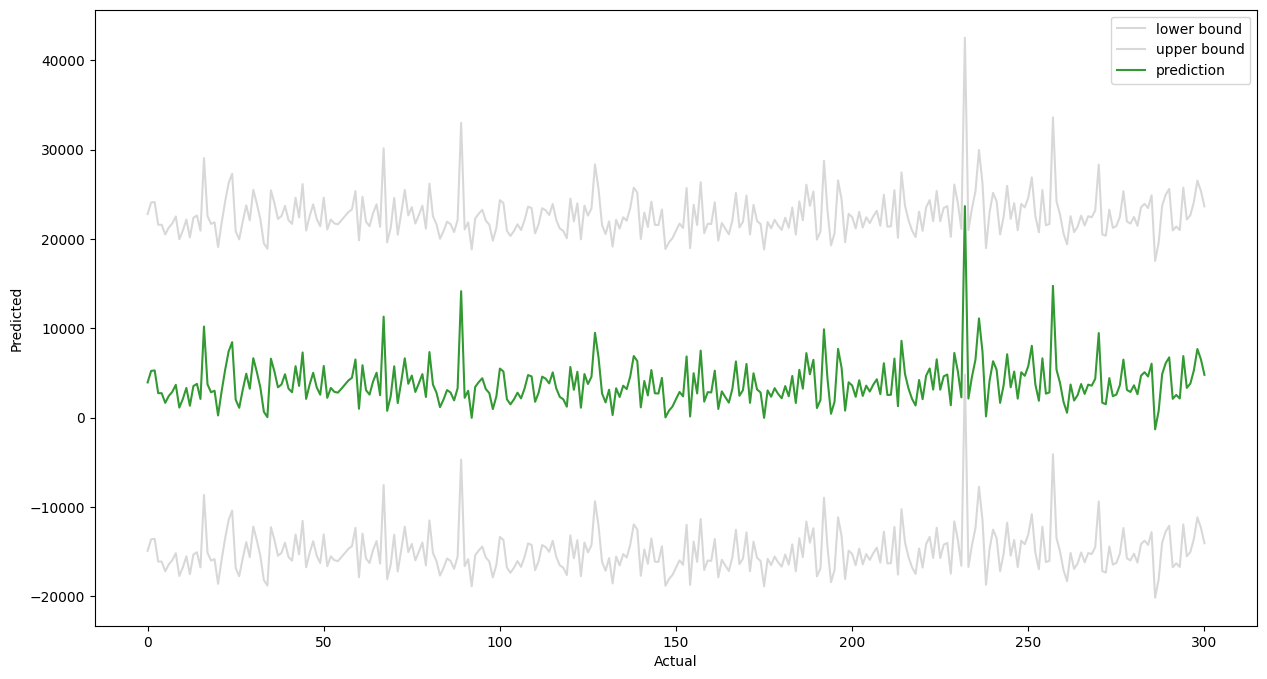

In [44]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_rid,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Lasso Regression: (L1 Regularization)

In [45]:
# Model training
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(x_train,y_train)
print("Training R2 score: "+ str(las.score(x_train,y_train)))

Training R2 score: 0.06639705114487604


In [46]:
# Predicting on the test and evaluating the accuracy
preds_las = las.predict(x_test).reshape(-1,1)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_las)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_las)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_las))))

Test R2 score: -0.005969779326240987
Test MAE: 5376.267775843407
Test RMSE: 38450.60353763835


In [47]:
pd.DataFrame(zip(las.coef_.T, x_train.columns))

,0,1
0,0.000040,article_id
1,5498.092272,unique_tokens_rate
2,113.909574,num_hrefs
3,-73.829267,num_imgs
4,-120.766356,num_videos
5,-1361.625011,average_token_length
6,-207.411737,num_keywords
7,-1.623452,min_avg_key
8,-0.316272,max_avg_key
9,2.154402,avg_avg_key


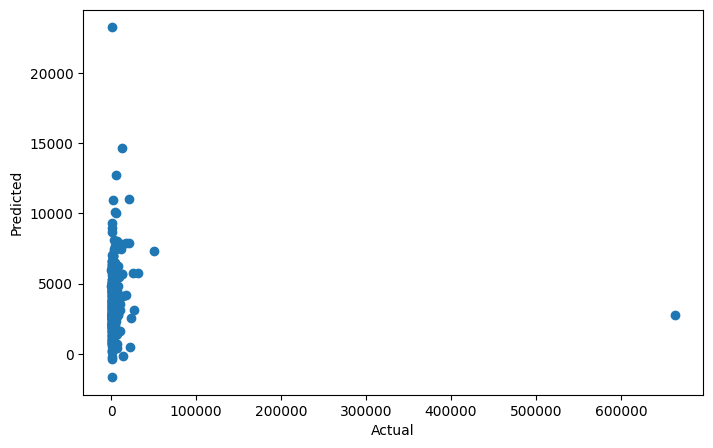

In [48]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_las)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [49]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_las:
    lower, upper =  get_prediction_interval(i, y_train.values, las.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [50]:
print(lower_vet[:5])
print(upper_vet[:5])

[-14381.501528529809, -13623.55410239, -12689.488610340379, -16092.443610157936, -16245.794570356327]
[23252.09619667378, 24010.043622813588, 24944.10911486321, 21541.154115045654, 21387.80315484726]


In [51]:
preds_las

array([[ 4435.29733407],
       [ 5193.24476021],
       [ 6127.31025226],
       [ 2724.35525244],
       [ 2571.00429225],
       [ 2129.69309625],
       [ 2076.00110696],
       [ 2844.89621055],
       [ 4111.21950664],
       [ 1198.61231956],
       [ 3299.71231278],
       [ 3561.90886605],
       [ 1263.45380234],
       [ 3407.89883008],
       [ 3716.99329535],
       [ 2316.31201612],
       [10121.51207812],
       [ 2657.19086482],
       [ 2445.25262217],
       [ 3852.3470447 ],
       [  275.99211147],
       [ 2797.52122695],
       [ 5889.06318816],
       [ 7566.79590309],
       [ 8082.38928705],
       [ 2209.02622583],
       [  881.95938956],
       [ 3229.92684811],
       [ 5836.43916368],
       [ 2371.57199719],
       [ 6637.88002755],
       [ 5119.11039361],
       [ 4286.34800594],
       [  536.80588026],
       [  606.98820457],
       [ 6274.13538852],
       [ 5071.46735228],
       [ 2599.09546017],
       [ 3961.8278388 ],
       [ 4826.33529625],


In [52]:
df_las = pd.DataFrame(zip(lower_vet,upper_vet,preds_las.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_las.shape)
df_las.head()

(301, 3)


,lower,upper,mean
0,-14381.501529,23252.096197,4435.297334
1,-13623.554102,24010.043623,5193.244760
2,-12689.488610,24944.109115,6127.310252
3,-16092.443610,21541.154115,2724.355252
4,-16245.794570,21387.803155,2571.004292


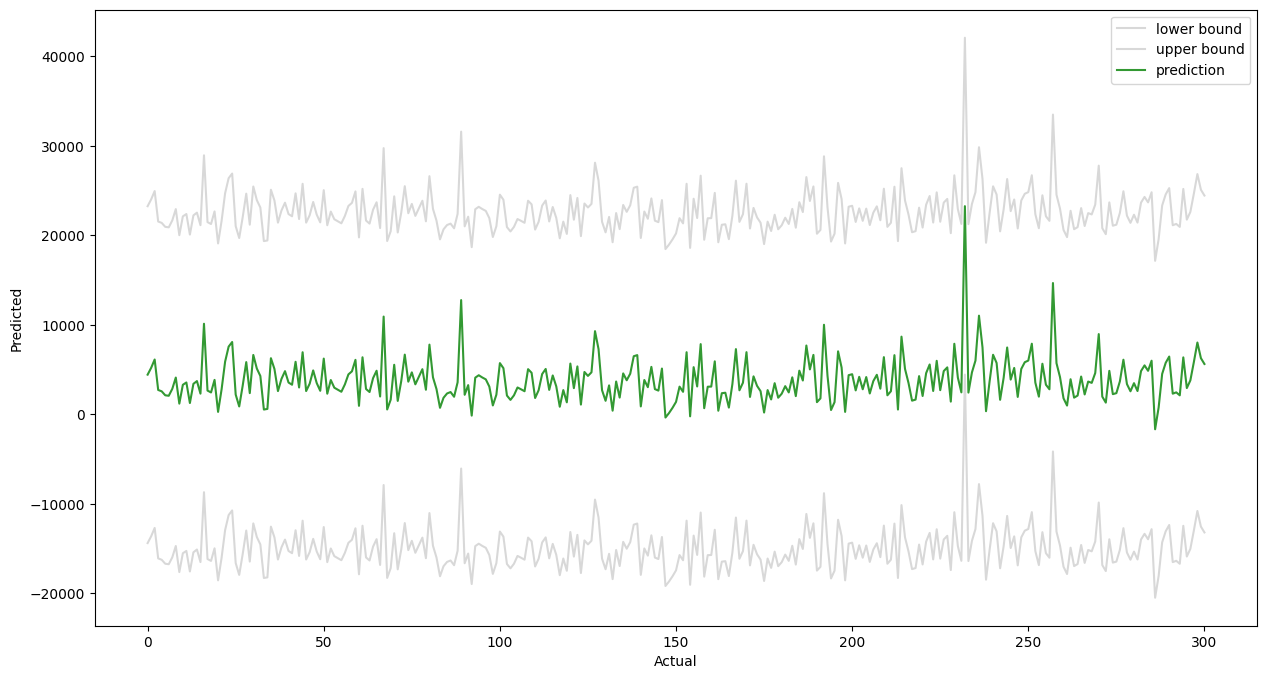

In [53]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_las,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

# Ensemble

In [54]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.06606482179578188


In [55]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: -0.005923416829740402
Test MAE: 5362.742635062325
Test RMSE: 38449.71748392747


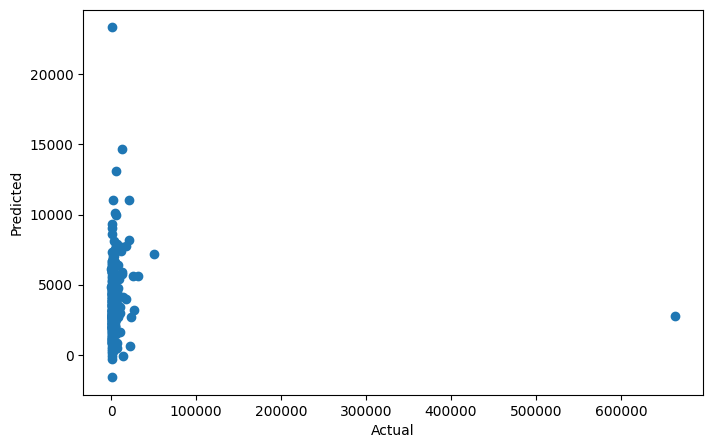

In [56]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [57]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [58]:
print(lower_vet[:5])
print(upper_vet[:5])

[-14573.360277645479, -13644.189892430073, -12930.030665117109, -16141.945051210256, -16261.207681066731]
[23066.932945665787, 23996.103330881193, 24710.262558194157, 21498.34817210101, 21379.085542244535]


In [59]:
preds_vote.reshape(-1)

array([ 4246.78633401,  5175.95671923,  5890.11594654,  2678.20156045,
        2558.93893059,  2034.98639923,  2154.39665047,  2849.08742654,
        4094.27209062,  1190.87442012,  3015.20466027,  3464.03026157,
        1279.12901607,  3413.01629049,  3737.10291584,  2233.82001735,
       10124.06475415,  2915.48750287,  2651.00637281,  3647.75058424,
         258.93255912,  2800.4919267 ,  5778.19888619,  7532.21780694,
        8109.70994598,  2239.39954363,   955.89118519,  3212.90822572,
        5585.23133841,  2562.7565555 ,  6659.70174926,  5058.93291165,
        4064.88750681,   566.89127582,   453.87460853,  6423.00447533,
        5044.13147582,  2803.85987745,  3852.90282111,  4824.35563151,
        3537.00240728,  3208.41123594,  5854.12771597,  3097.34898277,
        7010.59232557,  2454.40522027,  3480.00426334,  4948.29520794,
        3471.72550144,  2606.14836081,  6109.54286412,  2334.74656721,
        3727.26765766,  2935.71659428,  2742.58165383,  2678.33977709,
      

In [60]:
df_vote = pd.DataFrame(zip(lower_vet,upper_vet,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(301, 3)


,lower,upper,mean
0,-14573.360278,23066.932946,4246.786334
1,-13644.189892,23996.103331,5175.956719
2,-12930.030665,24710.262558,5890.115947
3,-16141.945051,21498.348172,2678.201560
4,-16261.207681,21379.085542,2558.938931


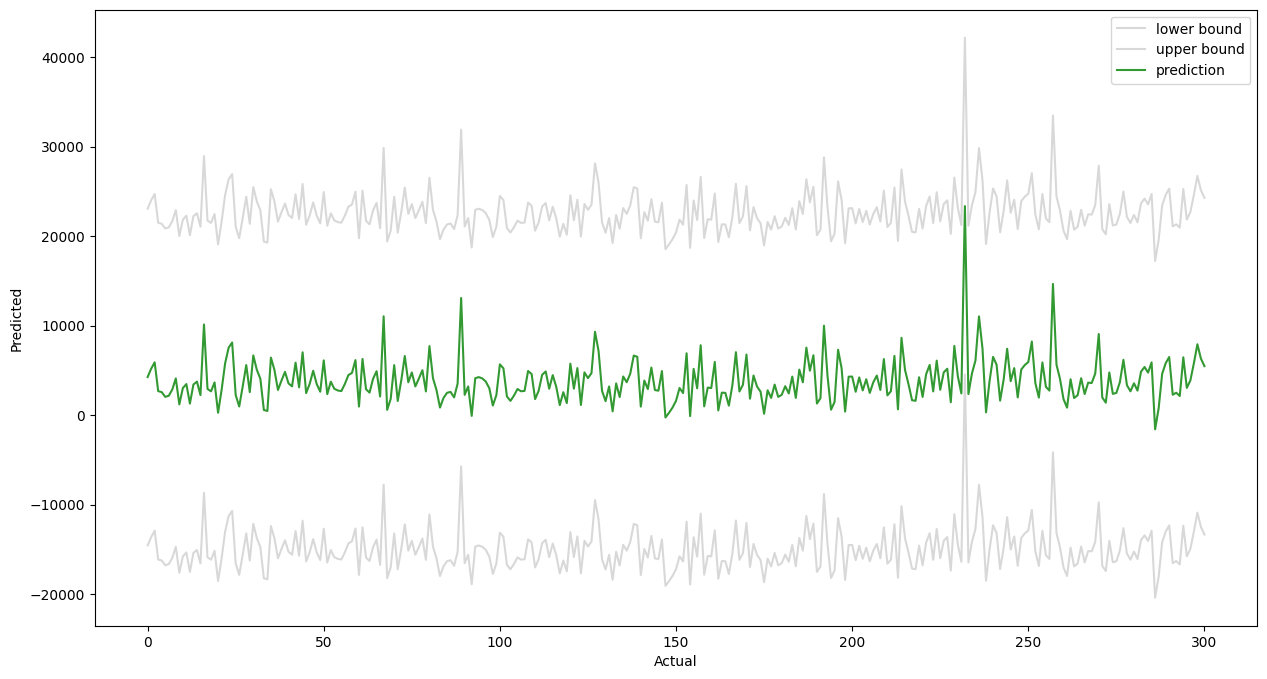

In [61]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

In [62]:
# Getting the interval estimate for future test usage
interval_est = get_interval_estimate(y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
print(interval_est)

import pickle
fileName = 'model/interval_est.pkl'
with open(fileName,'wb') as f:
    pickle.dump(interval_est,f)

18820.146611655633


# Saving the final trained model:

In [63]:
import joblib

fileName = 'model/property_price_prediction_voting.sav'
joblib.dump(voting_ensemble,fileName)

['model/property_price_prediction_voting.sav']

In [64]:
# load the model from disk
import joblib
fileName = 'model/property_price_prediction_voting.sav'
loaded_model = joblib.load(fileName)
print(loaded_model)

VotingRegressor(estimators=[('lr', LinearRegression()), ('rid', Ridge()),
                            ('lasso', Lasso())])


In [65]:
# testing it on the test data
result = loaded_model.score(x_test, y_test)
print(result)

-0.005923416829740402
